In [71]:
#Author: Xavier Aguas
# Project Analysis Name: Earthquakes, 1965-2016


In [72]:
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
# stat on data
from scipy import stats
from scipy.stats import norm, skew


In [73]:
#Load dataset
df = pd.read_csv(r"./database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [74]:
print('Shape of the file')
print('-'*30)
print(df.shape)


Shape of the file
------------------------------
(23412, 21)


In [75]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):

    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='gray', linestyle='-')
    plt.title('Valores NaN en cada característica', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Características con más de {thresh}% de NaN', fontsize=12, color='gray',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Características con menos de {thresh} de NaN', fontsize=12, color='gray',
         ha='left' ,va='top')
    plt.xlabel('Características', size=15, weight='bold')
    plt.ylabel('Porcentaje de valores NaN')
    
    return plt.show()

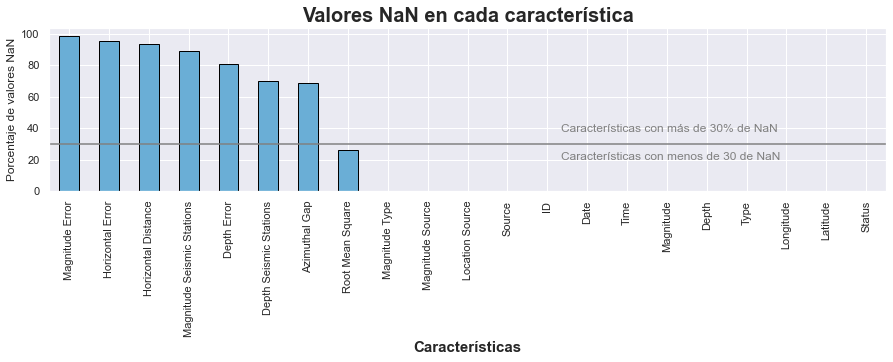

In [76]:
msv1(df, 30, color=sns.color_palette('Blues',n_colors=1))

In [77]:
# drop all the columns with more than 30% of missing values
df = df.dropna(thresh=len(df)*0.70, axis=1)

In [78]:
# create list with columns having NaN values
col_with_NaN_value = df.columns[df.isnull().any()]
# create df with only columns having NaN value 
df_nan = df[col_with_NaN_value]
# count number of NaN value per columns
print('Number of NaN values')
print('-'*30)
df_nan.isnull().sum()

Number of NaN values
------------------------------


Magnitude Type         3
Root Mean Square    6060
dtype: int64

In [79]:
# drop rows with the 3 missing values in 'magnitude type'
df = df.dropna(subset=['Magnitude Type'])

# replace nan value in RMS with mean columns
df['Root Mean Square'] = df['Root Mean Square'].fillna(value=df['Root Mean Square'].mean())

# verify operations:
df.isnull().sum()

# reset index
df = df.reset_index()